## Covid-19 Twitter Sentiment Analysis
#### The dataset consist of 6300 records of twitter tweets extracted from twitter. The polarity of sentiments is achieved using Orange Cluster which is auto nlp software. 

In [1]:
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
from textblob import TextBlob

In [2]:
df=pd.read_csv("covidtwweetsprocessesorange.csv")

In [3]:
df.head()

,sentiment,Content,Date,Language,Location,Number of Likes,Number of Retweets,In Reply To,Author Name,Author Description,Author Statuses Count,Author Favourites Count,Author Friends Count,Author Followers Count,Author Listed Count,Author Verified,Longitude,Latitude,Author
0,continuous,string,time,discrete,US ZA GB NG IN IE IT OM AU RO XK HR AE ZW DE K...,continuous,continuous,@SkyNewsBreak @BBCHughPym @SkyNews @PippaCrera...,Thand🌏ra\ Times Victor\ Bryan\ Stone Narrato P...,string,continuous,continuous,continuous,continuous,continuous,False True,continuous,continuous,@thandoratimes @Vic_Stone1 @narratoio @CodePol...
1,NaN,meta title=True,meta,meta,meta,meta,meta,meta,meta,meta,meta,meta,meta,meta,meta,meta,meta,meta,meta
2,-3.4482758620689653,GLOBAL COVID-19 UPDATE: Tenn. governor enacts ...,2020-12-21 11:11:40,en,NaN,0.0,0.0,NaN,PhatzNewsRoom,"Breaking News, News, Music, Sports, Politics, ...",76609.0,29591.0,988.0,6849.0,30.0,False,NaN,NaN,@RealPhatsBlog
3,5.555555555555555,@virtualnotviral No more COVID19 \nPeace for a...,2020-12-21 11:11:40,en,NaN,0.0,0.0,@virtualnotviral,Hazem Osrof,"Life goes on, so take it easy!",52.0,161.0,190.0,58.0,0.0,False,NaN,NaN,@HazemOsrof
4,6.25,Our research and development efforts have begu...,2020-12-21 11:11:38,en,NaN,0.0,0.0,NaN,CEPI,Coalition for Epidemic Preparedness Innovation...,6437.0,3753.0,1103.0,32302.0,604.0,True,NaN,NaN,@CEPIvaccines


In [4]:
df.shape

(6302, 19)

In [5]:
data=pd.DataFrame(df,columns=["Content","sentiment"])

In [6]:
data.tail()

,Content,sentiment
6297,Which Type Of Christmas Tree Is Decking Your H...,0.0
6298,#IndiaFightsCorona:\n📍Follow simple #Handwashi...,0.0
6299,#COVID19 health pass apps can help reopen busi...,3.225806451612903
6300,#COVID19 vaccine transportation is an unpreced...,1.9607843137254901
6301,We've collected 20 McKinsey charts that tell m...,0.0


In [7]:
#Checking for missing values
data.isnull().sum()

Content      0
sentiment    1
dtype: int64

In [8]:
data.fillna(value=0,inplace=True)

In [9]:
data.isnull().sum()

Content      0
sentiment    0
dtype: int64

In [10]:
data.shape

(6302, 2)

### Data Preprocesing

In [11]:
import re
def clean_tweet(Content):
    Content = re.sub("RT @[\w]*:","",Content)
    Content = re.sub("@[\w]*","",Content)
    Content = re.sub("https?://[A-Za-z0-9./]*","",Content)
    Content = re.sub("\n","",Content) 
    return Content

In [12]:
data['Content'] = data['Content'].apply(lambda x : clean_tweet(x))

In [13]:
def sentiments(sentiment):
    if sentiment < 0:
        return "negative"
    elif sentiment == 0:
        return "neutral"
    else:
        return "positive"

In [14]:
# Taking data from 2nd record as first two contains strings
data = data.iloc[2:]

In [15]:
#Converting the strings sentiment values into numeric
data["sentiment"] = pd.to_numeric(data["sentiment"])

In [16]:
data.head()

,Content,sentiment
2,GLOBAL COVID-19 UPDATE: Tenn. governor enacts ...,-3.448276
3,No more COVID19 Peace for all nations And fin...,5.555556
4,Our research and development efforts have begu...,6.250000
5,395 new cases and 26 new deaths in Slovenia [1...,0.000000
6,All flights from UK to India suspended as new ...,-3.846154


In [17]:
#Applying the bifurcation on data
data["sentimenta"] = data["sentiment"].apply(lambda x :sentiments(x))

In [18]:
data["sentimenta"].value_counts()

neutral     2270
negative    2269
positive    1761
Name: sentimenta, dtype: int64

In [19]:
data.tail(20)

,Content,sentiment,sentimenta
6282,We’re proud to help keep businesses running du...,2.702703,positive
6283,Republicans traded stocks for money; the Peopl...,-4.000000,negative
6284,#sapsFS⚠️Virginia Police Station temporarily c...,0.000000,neutral
6285,"🟧 Total Confirmed: 76,836,147🟩 Total Recovered...",-1.587302,negative
6286,Happy New Week and Merry Christmas💕💜❤#negrosol...,7.317073,positive
6287,"🟧 Total Confirmed: 76,836,147🟩 Total Recovered...",-1.587302,negative
6288,China’s top language research agency announces...,1.515152,positive
6289,"Our Medical Director, Nicki Murdock, is urging...",1.515152,positive
6290,"Evolution of number of cases for Barbados, wit...",0.000000,neutral
6291,iXensor aims to close the loop of #COVID19 out...,0.000000,neutral


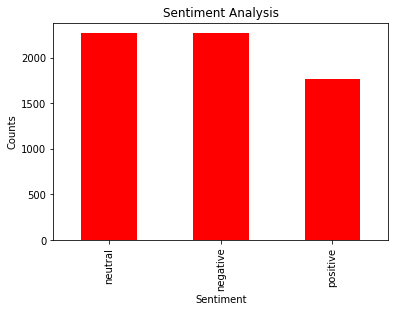

In [20]:
#show the value counts
data['sentimenta'].value_counts()

#plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
data['sentimenta'].value_counts().plot(kind='bar',color='red')
plt.show()

In [21]:
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [22]:
#Convert in Lower case
data['Content'] = data['Content'].apply(lambda x : x.lower())


In [23]:
stemmer = PorterStemmer()
wordnet_lemmatizer = WordNetLemmatizer()

# add stemming and lemmatisation in the preprocess function
def preprocess(document, stem=True):

    # tokenize into words
    words = word_tokenize(document)

    # remove stop words
    words = [word for word in words if word not in stopwords.words("english")]
    
    if stem:
        words = [stemmer.stem(word) for word in words]
    else:
        words = [wordnet_lemmatizer.lemmatize(word, pos='v') for word in words]

    # join words to make sentence
    document = " ".join(words)
    
    return document

In [24]:
data['Content'] = data['Content'].apply(lambda x : preprocess(x))

In [25]:
contractions = { 
"ain't": "am not / are not / is not / has not / have not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is / how does",
"i'd": "I had / I would",
"i'd've": "I would have",
"i'll": "I shall / I will",
"i'll've": "I shall have / I will have",
"i'm": "I am",
"i've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}

In [26]:
def cont_to_exp(x):
    if type(x) is str:
        for key in contractions:
            value = contractions[key]
            x = x.replace(key, value)
        return x
    else:
        return x

In [27]:
data['Content'] = data['Content'].apply(lambda x : cont_to_exp(x))

In [28]:
data.head(5)

,Content,sentiment,sentimenta
2,global covid-19 updat : tenn. governor enact n...,-3.448276,negative
3,covid19 peac nation final full fund phd schola...,5.555556,positive
4,research develop effort begun pay 🔬we safe eff...,6.250000,positive
5,395 new case 26 new death slovenia [ 11:11 gmt...,0.000000,neutral
6,flight uk india suspend new strain òf covid19 ...,-3.846154,negative


In [29]:
positive_df=data[data['sentimenta']=='positive']


In [30]:
negative_df=data[data['sentimenta']=='negative']

In [31]:
neutral_df=data[data['sentimenta']=='neutral']

In [32]:
from wordcloud import WordCloud

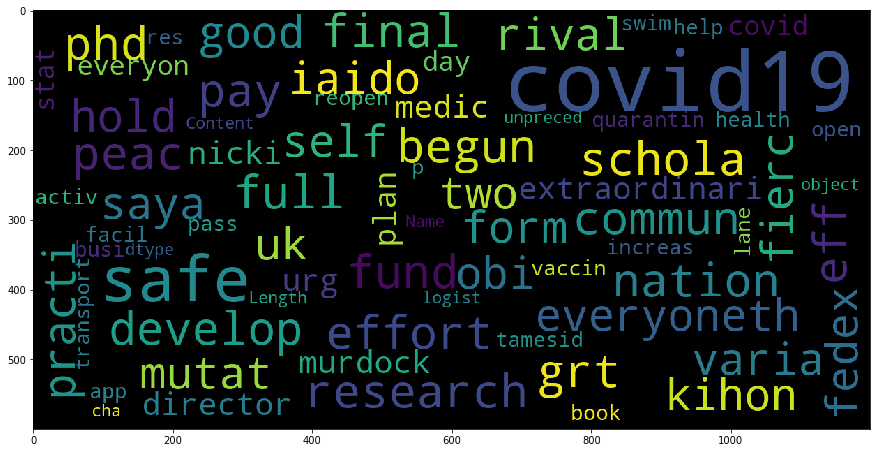

In [33]:
#Positive wordcloud
wordcloud = WordCloud(background_color='black',
                      max_font_size=40, scale=3,random_state=1).generate(str(positive_df["Content"]))

fig = plt.figure(1, figsize=(15, 15))
plt.imshow(wordcloud)
plt.show()

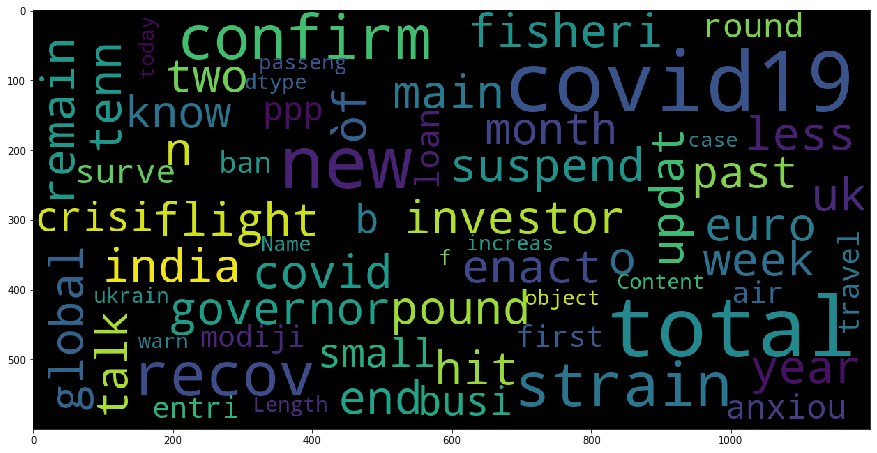

In [34]:
#Negative wordcloud
wordcloud = WordCloud(background_color='black',
                      max_font_size=40, scale=3,random_state=1).generate(str(negative_df["Content"]))

fig = plt.figure(1, figsize=(15, 15))
plt.imshow(wordcloud)
plt.show()

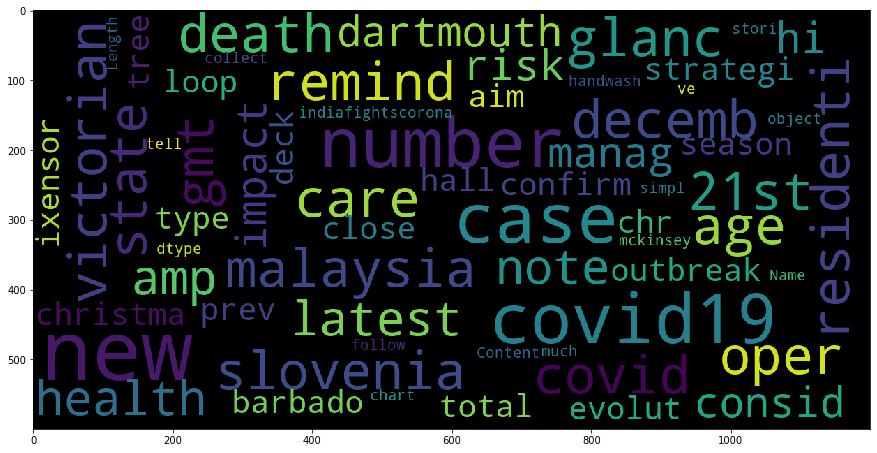

In [35]:
#Neutral wordcloud
wordcloud = WordCloud(background_color='black',
                      max_font_size=40, scale=3,random_state=1).generate(str(neutral_df["Content"]))

fig = plt.figure(1, figsize=(15, 15))
plt.imshow(wordcloud)
plt.show()

In [36]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

#Model Selection and Validation
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,roc_auc_score,roc_curve

In [37]:
X=data['Content']
Y= data['sentimenta']

In [74]:
#Selecting Generaalised model
from sklearn.model_selection import train_test_split
for i in range(0,6000):
    X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,random_state = i)
    pipeline = Pipeline([
                  ('countVectorizer',CountVectorizer()),
                  ('tf-idf',TfidfTransformer()),
                  ('multinomialNB',MultinomialNB())])
    pipeline.fit(X_train,y_train)
    
    train_score = pipeline.score(X_train,y_train)
    test_score = pipeline.score(X_test,y_test)
    
    if test_score > train_score:
        print("Testing {}  Training {}  Random State {}".format(test_score,train_score,i))
else: print("No Generalised Model Found")

No Generalised Model Found


In [69]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,random_state = 79)

In [70]:
pipeline = Pipeline([('countVectorizer',CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')),
                     ('tf-idf',TfidfTransformer()),
                     ('multinomialNB',MultinomialNB())])
pipeline.fit(x_train,y_train)

Pipeline(steps=[('countVectorizer',
                 CountVectorizer(max_df=0.9, max_features=1000, min_df=2,
                                 stop_words='english')),
                ('tf-idf', TfidfTransformer()),
                ('multinomialNB', MultinomialNB())])

In [71]:
predictions = pipeline.predict(x_test)

print(classification_report(predictions,y_test))
print ('\n')
print(confusion_matrix(predictions,y_test))
print(accuracy_score(predictions,y_test))

              precision    recall  f1-score   support

    negative       0.73      0.63      0.68       521
     neutral       0.55      0.56      0.56       467
    positive       0.53      0.65      0.58       272

    accuracy                           0.61      1260
   macro avg       0.60      0.62      0.61      1260
weighted avg       0.62      0.61      0.61      1260



[[329 145  47]
 [ 94 263 110]
 [ 26  69 177]]
0.6103174603174604


#### Trained model achieved 61.03% of accuracy by classifying sentiments of tweets

In [72]:
pred1_train=pipeline.predict(x_train)

In [73]:
print("Test:",accuracy_score(predictions,y_test))
print("Train:",accuracy_score(pred1_train,y_train))

Test: 0.6103174603174604
Train: 0.7029761904761904


In [42]:
from yellowbrick.classifier import ROCAUC

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


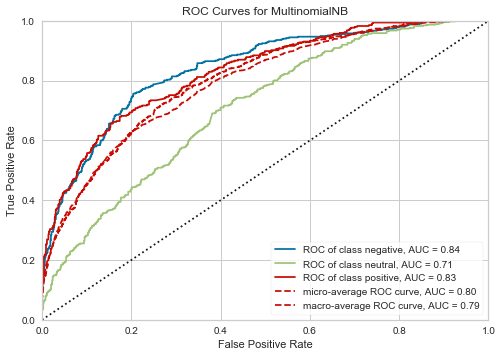

In [44]:
visualizer = ROCAUC(pipeline, classes=['negative','neutral','positive'])

visualizer.fit(x_train, y_train)        # Fit the training data to the visualizer
visualizer.score(x_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure

### Evaluating model

In [53]:
predictions

array(['negative', 'negative', 'neutral', ..., 'positive', 'positive',
       'negative'], dtype='<U8')

In [44]:
Tweet1=["Vaccination is also available out there in market."]

In [45]:
pred1=pipeline.predict(Tweet1)

In [46]:
pred1

array(['neutral'], dtype='<U8')

In [47]:
Tweet2=["Poor man Covid19 is increasing day by day now. It is very difficult to survive."]

In [48]:
pred2=pipeline.predict(Tweet2)

In [49]:
pred2

array(['negative'], dtype='<U8')